# 데이터 로드

In [65]:
import pandas as pd
import numpy as np
import re

In [66]:
df = pd.read_csv('./new_data.csv', encoding = 'CP949', engine = 'python')
df

,score,review
0,8.0,전편을 안보면 이해가 안가는 부분이 많다는 것과 세밀한 설정으로 짜였던 구작과는 달...
1,4.0,역사의 뒤안길...구질구질한 또 하나의 회귀성. 상징과 표상의 반영은 어렵다
2,5.0,사실 매트릭스 3에서 내용이 종결되었는데 그걸 다시 4에서 연결 시키려고 엄청 수고...
3,7.0,나쁘지는 않게 봤다...
4,NaN,NaN
...,...,...
9721,1.0,"뭘 해도 기본은 합시다, 이건 뭐 엉망진창도 정도껏 해야지"
9722,10.0,20대와 40대의 사랑에 대한 거부감에 사로잡히셨나 다들.. ㄷㄷ저는 개인적으로 재...
9723,6.0,각본 좋았음. 대사. 디테일이 살아있음
9724,NaN,NaN


# 데이터 정제

In [67]:
df = df.dropna()
df

,score,review
0,8.0,전편을 안보면 이해가 안가는 부분이 많다는 것과 세밀한 설정으로 짜였던 구작과는 달...
1,4.0,역사의 뒤안길...구질구질한 또 하나의 회귀성. 상징과 표상의 반영은 어렵다
2,5.0,사실 매트릭스 3에서 내용이 종결되었는데 그걸 다시 4에서 연결 시키려고 엄청 수고...
3,7.0,나쁘지는 않게 봤다...
5,7.0,대체 속편을 왜 만든거야?
...,...,...
9718,6.0,황우슬혜랑 나올때 ㅈㄹ웃김ㅋㅋㅋ
9721,1.0,"뭘 해도 기본은 합시다, 이건 뭐 엉망진창도 정도껏 해야지"
9722,10.0,20대와 40대의 사랑에 대한 거부감에 사로잡히셨나 다들.. ㄷㄷ저는 개인적으로 재...
9723,6.0,각본 좋았음. 대사. 디테일이 살아있음


In [68]:
df.set_index('review', inplace = True)
df = df.astype('int')
df.reset_index(inplace = True)
df

,review,score
0,전편을 안보면 이해가 안가는 부분이 많다는 것과 세밀한 설정으로 짜였던 구작과는 달...,8
1,역사의 뒤안길...구질구질한 또 하나의 회귀성. 상징과 표상의 반영은 어렵다,4
2,사실 매트릭스 3에서 내용이 종결되었는데 그걸 다시 4에서 연결 시키려고 엄청 수고...,5
3,나쁘지는 않게 봤다...,7
4,대체 속편을 왜 만든거야?,7
...,...,...
8558,황우슬혜랑 나올때 ㅈㄹ웃김ㅋㅋㅋ,6
8559,"뭘 해도 기본은 합시다, 이건 뭐 엉망진창도 정도껏 해야지",1
8560,20대와 40대의 사랑에 대한 거부감에 사로잡히셨나 다들.. ㄷㄷ저는 개인적으로 재...,10
8561,각본 좋았음. 대사. 디테일이 살아있음,6


In [69]:
# 중복 데이터 확인
df['review'].nunique()

8516

In [70]:
# 중복 삭제
df.drop_duplicates(subset=['review'], inplace = True)
len(df)

8516

In [71]:
# 특수문자 제거
df['review']=df['review'].str.replace(r'[^ ㄱ-ㅣ가-힣]+', " ")
df['review'].head()

C:\Users\user\AppData\Local\Temp/ipykernel_9936/1515878519.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review']=df['review'].str.replace(r'[^ ㄱ-ㅣ가-힣]+', " ")


0    전편을 안보면 이해가 안가는 부분이 많다는 것과 세밀한 설정으로 짜였던 구작과는 달...
1             역사의 뒤안길 구질구질한 또 하나의 회귀성  상징과 표상의 반영은 어렵다
2    사실 매트릭스  에서 내용이 종결되었는데 그걸 다시  에서 연결 시키려고 엄청 수고...
3                                          나쁘지는 않게 봤다 
4                                       대체 속편을 왜 만든거야 
Name: review, dtype: object

In [72]:
# 공백만 남은 데이터 nan으로 처리
df['review'] = df['review'].str.replace('^ +','')
df['review'].replace('',np.nan, inplace = True)
df.isnull().sum()

C:\Users\user\AppData\Local\Temp/ipykernel_9936/2893747123.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('^ +','')


review    19
score      0
dtype: int64

In [73]:
# nan 삭제
df = df.dropna(how='any')
len(df)

8497

<AxesSubplot:>

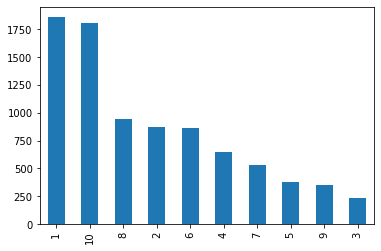

In [74]:
df['score'].value_counts().plot(kind='bar')

# 토큰화

In [75]:
x_data = df['review']
len(x_data)

8497

In [76]:
y_data = df['score']
len(y_data)

8497

In [77]:
# 불용어 파일
stop = pd.read_csv('./한국어불용어100.txt', sep = '\t', encoding = 'utf-8')

In [78]:
stop

,불용어,구분,id
0,이,VCP,0.018280
1,있,VA,0.011699
2,하,VV,0.009774
3,것,NNB,0.009733
4,들,XSN,0.006898
...,...,...,...
95,원,NNB,0.000492
96,잘,MAG,0.000491
97,통하,VV,0.000487
98,소리,NNG,0.000486


In [79]:
# 불용어 리스트 생성
stopword = stop['불용어'].tolist()

In [80]:
from konlpy.tag import Okt
okt = Okt()

In [81]:
x_stopword = []
for x in x_data:
    word_tokens = okt.morphs(x)    
    result = [word for word in word_tokens if not word in stopword]
    x_stopword.append(result)
    
x_stopword

[['전편',
  '을',
  '안보',
  '면',
  '이해',
  '가는',
  '부분',
  '많다는',
  '과',
  '세밀',
  '설정',
  '으로',
  '짜였던',
  '구',
  '작',
  '과는',
  '달리',
  '뭔가',
  '부족한',
  '느낌',
  '과',
  '뭔가',
  '허',
  '접',
  '최종',
  '보스'],
 ['역사',
  '의',
  '뒤안길',
  '구질구질한',
  '의',
  '회귀',
  '성',
  '상징',
  '과',
  '표상',
  '의',
  '반영은',
  '어렵다'],
 ['매트릭스',
  '에서',
  '내용',
  '종결',
  '되었는데',
  '그걸',
  '에서',
  '연결',
  '시키려고',
  '엄청',
  '수고',
  '하네요',
  '영화',
  '의',
  '절반',
  '을',
  '어떻게',
  '연결',
  '되는지',
  '보고',
  '있으려니',
  '짜증',
  '확',
  '밀려옵니다'],
 ['나쁘지는', '않게', '봤다'],
 ['대체', '속편', '을', '왜', '만든거야'],
 ['그렇게', '나쁘진', '않음', '스토리', '도', '괜찮은데', '액션', '약한게', '단점', '최악', '은', '아님'],
 ['매트릭스', '의', '시리즈', '의', '기대', '를', '접어', '두어라'],
 ['중간',
  '마다',
  '배경',
  '나오는건',
  '볼',
  '만',
  '외',
  '에는',
  '그닥',
  '그냥',
  '추억',
  '팔이',
  '영화인',
  '듯'],
 ['모든',
  '감상',
  '에는',
  '맥락',
  '있다',
  '매트릭스',
  '대단',
  '했던',
  '건',
  '에',
  '영화',
  '나왔다는',
  '이다',
  '맛',
  '에',
  '빠져',
  '지난',
  '우려',
  '먹으러',
  '하면',
  '관객',
  '의',
  '반응',
  '

In [17]:
x_stop1 = []
for sentece in x_data[0:1000]:
    tokenized_sentece = kkma.morphs(sentece)
    stopwords_remove_sentece = [word for word in tokenized_sentece if not word in stopwords]
    
    x_stop1.append(stopwords_remove_sentece)
x_stop1

[['전편',
  '을',
  '면',
  '이해',
  '갈',
  '는',
  '부분',
  '다는',
  '과',
  '세밀',
  'ㄴ',
  '설정',
  '으로',
  '짜이',
  '었',
  'ㄴ',
  '구작',
  '과',
  '는',
  '달리',
  '뭔',
  '부족',
  'ㄴ',
  '느낌',
  '과',
  '뭔',
  '허',
  '접하',
  'ㄴ',
  '최종',
  '보스'],
 ['역사',
  '의',
  '뒤안길',
  '구질',
  '구질',
  'ㄴ',
  '의',
  '회귀성',
  '상징',
  '과',
  '표상',
  '의',
  '반영',
  '은',
  '어렵',
  '다'],
 ['매트릭스',
  '에서',
  '내용',
  '종결',
  '었',
  '는데',
  '을',
  '에서',
  '연결',
  '려고',
  '엄청',
  '수고',
  '네요',
  '영화',
  '의',
  '절반',
  '을',
  '게',
  '연결',
  '는지',
  '보고',
  '으려니',
  '짜증',
  '확',
  '밀려오',
  'ㅂ니다'],
 ['나쁘', '는', '게', '았', '다'],
 ['대체', '속편', '을', '외', '어', 'ㄴ', '거', '야'],
 ['게',
  '나쁘',
  '는',
  '음',
  '스토리',
  '도',
  '괜찮',
  '은데',
  '액션',
  '약하',
  'ㄴ',
  '단점',
  '최악',
  '은',
  'ㅁ'],
 ['매트릭스', '의', '시리즈', '의', '기대', '를', '접', '어', '어라'],
 ['중간',
  '마다',
  '배경',
  '는',
  '건',
  'ㄹ',
  '만하',
  'ㄴ데',
  '외',
  '에',
  '는',
  '그닥',
  '그냥',
  '추억',
  '팔',
  '영화',
  'ㄴ',
  '듯'],
 ['모든',
  '감상',
  '에',
  '는',
  '맥락',
  '있다',
  '매트릭스',

In [18]:
x_stop2 = []
for sentece in x_data[1000:2000]:
    tokenized_sentece = kkma.morphs(sentece)
    stopwords_remove_sentece = [word for word in tokenized_sentece if not word in stopwords]
    
    x_stop2.append(stopwords_remove_sentece)
x_stop2

[['그냥',
  '저냥',
  '볼만',
  '연결고리',
  '를',
  '명쾌',
  '게',
  '설명',
  '어',
  '고',
  '서',
  '도',
  '햇갈리',
  '는',
  '부분',
  '있음'],
 ['평론가',
  '호소',
  'ㄴ',
  '특',
  '남',
  '다',
  '재밌',
  '다는',
  '거',
  '일부러',
  '깔',
  'ㄹ',
  '요소',
  '찾',
  '음',
  '걍',
  '재밌',
  '고',
  '스토리',
  '뻔',
  '도',
  '고',
  '음'],
 ['최', '우', '식', '땜', '에', '았', '는데', '나름', '재밌', '었', '어요'],
 ['조진',
  '웅',
  '최',
  '우',
  '식',
  '배우',
  '의',
  '게',
  '미',
  '도',
  '고',
  '몰입',
  '감',
  '는',
  '내용',
  '으로',
  '지루',
  'ㅁ',
  '없이',
  '볼만',
  'ㄴ',
  '영화',
  'ㅁ'],
 ['대사',
  '들리',
  'ㄴ다는',
  '평점',
  '아서',
  '그리하',
  '여',
  '가는귀',
  '먹',
  '은',
  '할미',
  '라',
  '걱정',
  '고',
  '았',
  '는데',
  '들리',
  'ㅂ니다',
  '재밌',
  '게',
  '고',
  '았',
  '어요',
  '사회적',
  '으로',
  '이슈',
  'ㄹ',
  '는',
  '주제',
  '을',
  '배우',
  '분',
  '께서',
  '연기',
  '를',
  '잘하',
  '어',
  '시',
  '어서',
  '갈',
  '는',
  '줄',
  '고',
  '았',
  '네요',
  '키',
  'ㄹ',
  '링',
  '타임',
  '용'],
 ['사운드',
  '은데',
  '스토리',
  '전개',
  '빠르',
  '고',
  '지속',
  '는',
  '긴장감',
  '조진',
  '웅',


In [19]:
x_stop3 = []
for sentece in x_data[2000:3000]:
    tokenized_sentece = kkma.morphs(sentece)
    stopwords_remove_sentece = [word for word in tokenized_sentece if not word in stopwords]
    
    x_stop3.append(stopwords_remove_sentece)
x_stop3

[['영화',
  '로서',
  '는',
  '정말',
  '뻔하',
  '디',
  '뻔',
  'ㄴ',
  '전개',
  '와',
  '스토리',
  '여',
  '서',
  '별로',
  '만',
  '뭔',
  '옛날',
  '연말',
  '프로그램',
  '는',
  '거',
  '아서',
  '뻔하',
  'ㄴ',
  '따뜻',
  'ㅁ',
  '을',
  '은',
  '거',
  '아서',
  '았',
  '습니다',
  '연말',
  '느낌',
  '은',
  '면서',
  '느껴지',
  'ㄴ',
  '거',
  '아요',
  'ㅎㅎ',
  '영화',
  '으로',
  '만',
  '면',
  '정말',
  '별',
  '로',
  '에',
  '요',
  'ㅎㅎ'],
 ['티빙으', '로', '아서', '너무', '다행', '다'],
 ['아무리',
  '영화',
  '라지만',
  '진짜',
  '무슨',
  '소설',
  '을',
  '쓰',
  '어',
  '았',
  '네',
  '이러',
  'ㄴ',
  '기분',
  '계속',
  'ㅂ니다',
  '재미',
  '는',
  '둘째치',
  '고',
  '납득',
  '갈',
  '는',
  '부분',
  '이나',
  '억지',
  '스럽',
  'ㄴ',
  '느낌',
  '심하',
  'ㅂ니다',
  '뻔',
  '어도',
  '게',
  '까',
  '뻔',
  'ㄹ',
  '는',
  '스토리',
  '도',
  '고',
  '다가',
  '나가',
  '고',
  '다는'],
 ['눈',
  '도',
  '내리',
  '고',
  '연말',
  '겨울',
  '분위기',
  '서',
  '한해',
  '를',
  '마무리',
  '기',
  '은',
  '영화',
  '었',
  '습니다'],
 ['설레',
  '고',
  '연말',
  '분위기',
  '물씬',
  '느껴지',
  '는',
  '영화',
  '었',
  '어요',
  'ㅠㅠㅠ',
  '그리',
  '고',


In [20]:
x_stop4 = []
for sentece in x_data[3000:4000]:
    tokenized_sentece = kkma.morphs(sentece)
    stopwords_remove_sentece = [word for word in tokenized_sentece if not word in stopwords]
    
    x_stop4.append(stopwords_remove_sentece)
x_stop4

[['다',
  '았',
  '는데',
  '박용',
  '우',
  '만',
  '선',
  'ㄴ',
  '눈매',
  '옥',
  '의',
  '티',
  'ㄹ',
  '줄',
  '야'],
 ['액션', '고', '볼만', '었', '습니다', '다', '만', '개연성', '은', '별로'],
 ['윤',
  '계상',
  '액션',
  '최고',
  '간만',
  '에',
  '몰입',
  '어서',
  'ㄴ',
  '영화',
  '잼',
  '게',
  '았',
  '어요'],
 ['개연성',
  '은',
  '조금',
  '부족',
  '지만',
  '재미있',
  '었',
  '습니다',
  '몰입',
  '어서',
  '금방',
  '었',
  '네요'],
 ['초반',
  '에',
  '는',
  '약간',
  '지루',
  'ㄴ',
  '감',
  '었',
  '는데',
  '후반',
  '으로',
  '갈수록',
  '몰입',
  '감',
  '고',
  '재밌',
  '게',
  '았',
  '어요',
  '윤',
  '계상',
  '멋있',
  '었',
  '습니다'],
 ['소재', '특이', '고', '액', '서', '는', '습니다'],
 ['도입부',
  '에',
  '도저히',
  '예상',
  '기',
  '힘들',
  '었',
  'ㄴ',
  '전개',
  '뻔하',
  'ㄴ',
  '스토리',
  '로',
  '마무리',
  '는',
  '거',
  '에',
  '실망감',
  '을',
  '떨치',
  'ㄹ',
  '었',
  '다'],
 ['잼',
  '게',
  '았',
  '습니다',
  '집중',
  '며',
  '빠지',
  '어서',
  '보다',
  '니',
  '벌써',
  '끝나',
  'ㄹ',
  '더라',
  '구',
  '요'],
 ['제가', '유체', '이탈', 'ㄴ', '줄', '았', '습니다'],
 ['시작',
  '부터',
  '몰입',
  '감',
  '는',
  '연기',
  '와'

In [21]:
x_stop5 = []
for sentece in x_data[4000:5000]:
    tokenized_sentece = kkma.morphs(sentece)
    stopwords_remove_sentece = [word for word in tokenized_sentece if not word in stopwords]
    
    x_stop5.append(stopwords_remove_sentece)
x_stop5

[['김',
  '대명',
  '연기',
  '일품',
  '열리',
  'ㄴ',
  '결말',
  '수준',
  '라',
  '그냥',
  '이야기',
  '를',
  '중간',
  '에',
  '뚝',
  '끊',
  '음'],
 ['진심',
  '인생',
  '다',
  '다',
  '처음',
  '으로',
  '평점',
  '남기',
  'ㄴ다',
  '진짜',
  '쌍',
  '욕',
  '는',
  '영화',
  '베스트',
  '오브',
  '베스트',
  '극장가',
  '서',
  'ㄴ',
  '천만다행',
  '라',
  '영화',
  '를',
  'ㄴ',
  '거',
  '자체',
  '치욕',
  '스럽',
  '다'],
 ['처음',
  '은비',
  '복',
  '지원',
  '에',
  '았',
  '을',
  '신경',
  '도',
  '쓰',
  '었',
  '으면서',
  '석구',
  '장애인',
  '라는',
  '이유',
  '로',
  '이상한',
  '니',
  '삐뚤어지',
  'ㄴ',
  '눈',
  '으로',
  '석구',
  '를',
  '바라보',
  '며',
  '끝내',
  '는',
  '는',
  '로',
  '는',
  '사',
  '회복',
  '지사',
  '를',
  '면서',
  '계속',
  '짜증',
  '남',
  '송',
  '윤',
  '아가',
  '정말',
  '밉상',
  '으로'],
 ['가해자',
  '도',
  '피해자',
  '도',
  '는',
  '상황',
  '에서',
  '돌아가',
  '는',
  '우습',
  'ㄴ',
  '촌극',
  '거기',
  '에',
  '는',
  '꼭',
  '나이',
  '처먹',
  '든',
  '덜',
  'ㄴ',
  '계집',
  '아이',
  '든',
  '그년',
  '일조',
  '고',
  '다',
  '이것',
  '대한민국',
  '의',
  '일면',
  '진짜',
  '암',
  '걸리',
  'ㄴ다'],
 ['영화

In [22]:
x_stop6 = []
for sentece in x_data[5000:6000]:
    tokenized_sentece = kkma.morphs(sentece)
    stopwords_remove_sentece = [word for word in tokenized_sentece if not word in stopwords]
    
    x_stop6.append(stopwords_remove_sentece)
x_stop6

[['역시', '믿', '고', '거르', '는', '연상', '호'],
 ['류승룡',
  '의',
  '우스꽝스럽',
  'ㄴ',
  '염력',
  '을',
  '사용',
  '는',
  '연기',
  '만',
  '기억',
  '에',
  '남',
  '는',
  '영화'],
 ['솔직히',
  '영화',
  '왜',
  '망하',
  '었',
  '는지',
  '겠',
  '음',
  '진부',
  'ㄴ',
  '스토리',
  '이기',
  '는',
  '마',
  '나름',
  '대로',
  '웃기',
  'ㄴ',
  '장면',
  '도',
  '았',
  '고',
  '키',
  'ㄹ',
  '링',
  '타임',
  '용',
  '으로',
  '딱',
  '은',
  '음'],
 ['좌',
  '뻘',
  '괭이',
  '영화',
  '에',
  '합',
  '졸',
  '뭔',
  '내용',
  'ㄴ지',
  '도',
  '겠',
  '고',
  '조잡',
  '고',
  '유치',
  '기',
  '짝',
  '음',
  '평점',
  '점대',
  '조작',
  'ㅂ니다'],
 ['이과', '후진국', '의', '액션', '이란', 'ㄴ', '공부', 'ㅂ시다', '건', 'ㄹ', '여력', '다'],
 ['유치', '고', '보잘것', '지만', '그래서', '재밌', '다'],
 ['민', '사장', '연기', '하심', 'ㅋㅋㅋ'],
 ['아이', '와', '함께', '는데', '넘', '즐겁', '게', '았', '어요', '찡하', '기', '도', '고'],
 ['노', '잼', '노', '잼', '핵', '노', '잼', '왜', '땋', 'ㄴ', '을', '았'],
 ['촌', '스럽', 'ㄴ', '영화'],
 ['에서',
  '우연히',
  'ㄴ',
  '작품',
  '결론',
  '부터',
  '면',
  '키',
  'ㄹ',
  '링',
  '타임',
  '용',
  '으로',
  '볼만',
  '은',
  '배우',
  

In [23]:
x_stop7 = []
for sentece in x_data[6000:7000]:
    tokenized_sentece = kkma.morphs(sentece)
    stopwords_remove_sentece = [word for word in tokenized_sentece if not word in stopwords]
    
    x_stop7.append(stopwords_remove_sentece)
x_stop7

[['는', '괜찮', '은데'],
 ['강아지',
  '랑',
  '쇼',
  '파',
  '에',
  '눕',
  '어서',
  '았',
  '는데',
  '불',
  'ㄴ',
  '다가',
  '아',
  '짓',
  '어',
  '대',
  '서',
  '채널',
  '돌리',
  '었',
  '다'],
 ['다는', '아쉽'],
 ['ㅋㅋㅋㅋ',
  '에',
  '서',
  '길래',
  '았',
  '는데',
  '키',
  'ㄹ',
  '링',
  '타임',
  '용',
  '으로',
  '도',
  'ㄴ',
  '볼',
  '쓸',
  '레',
  '기',
  '영화',
  '다'],
 ['왠',
  '만',
  '해선',
  '평점',
  '등록',
  '는데',
  '영화',
  '는',
  '게',
  '네',
  '이것',
  '을',
  '까지',
  '올리',
  'ㄴ',
  '인간',
  '은',
  '눈',
  '다'],
 ['렇',
  '재밌',
  'ㄴ',
  '건',
  '지만',
  '다고',
  '을',
  '을',
  '로',
  '최악',
  '은',
  '였',
  '기에',
  '개인적',
  '으로',
  '나름',
  '재밌',
  '게',
  '았',
  '다'],
 ['분', '을', '버티', '고', '돌아서', '게', '네'],
 ['와하',
  '하하',
  '이번',
  '주말',
  '방송',
  '타',
  '아',
  '네',
  '아이',
  '고',
  '좆',
  '망이',
  '네',
  '벗트',
  '대부',
  '디지털',
  '리',
  '마스터링',
  '도',
  '뜨',
  'ㄴ다는',
  '거',
  '각',
  '잡고',
  '거나',
  '아야',
  '디',
  '후후',
  '즐겁',
  'ㄴ',
  '주말'],
 ['일단',
  '평점',
  '올라가',
  '었',
  '으면',
  '어서',
  '배우',
  '빵빵',
  '어서',
  'ㄴ가',
  '기대'

In [ ]:
x_stop8 = []
for sentece in x_data[7000:8000]:
    tokenized_sentece = kkma.morphs(sentece)
    stopwords_remove_sentece = [word for word in tokenized_sentece if not word in stopwords]
    
    x_stop8.append(stopwords_remove_sentece)
x_stop8

In [ ]:
x_stop9 = []
for sentece in x_data[8000:]:
    tokenized_sentece = kkma.morphs(sentece)
    stopwords_remove_sentece = [word for word in tokenized_sentece if not word in stopwords]
    
    x_stop9.append(stopwords_remove_sentece)
x_stop9

In [ ]:
x_stopword=x_stop1+x_stop2+x_stop3+x_stop4+x_stop5+x_stop6+x_stop7+x_stop8+x_stop9
x_stopword

In [82]:
import konlpy
from konlpy.tag import Kkma
kkma = Kkma()

In [83]:
word_list = []
for i in x_stopword:
    word = []
    for j in i:
        for x in kkma.pos(j):
            word.append((x[0]))
    word_list.append(word)
word_list

[['전편',
  '을',
  '안보',
  '면',
  '이해',
  '갈',
  '는',
  '부분',
  '많',
  '다는',
  '과',
  '세밀',
  '설정',
  '으',
  '로',
  '짜이',
  '었',
  '던',
  '구',
  '작',
  '과',
  '는',
  '달리',
  '뭔',
  '갈',
  '부족',
  '하',
  'ㄴ',
  '느낌',
  '과',
  '뭔',
  '갈',
  '허',
  '접',
  '최종',
  '보스'],
 ['역사',
  '의',
  '뒤안길',
  '구질',
  '구질',
  '하',
  'ㄴ',
  '의',
  '회귀',
  '성',
  '상징',
  '과',
  '표상',
  '의',
  '반영',
  '은',
  '어렵',
  '다'],
 ['매트릭스',
  '에서',
  '내용',
  '종결',
  '되',
  '었',
  '는데',
  '그것',
  '을',
  '에서',
  '연결',
  '시키',
  '려고',
  '엄청',
  '수고',
  '하',
  '네요',
  '영화',
  '의',
  '절반',
  '을',
  '어떻',
  '게',
  '연결',
  '되',
  '는지',
  '보',
  '고',
  '있',
  '으려니',
  '짜증',
  '확',
  '밀려오',
  'ㅂ니다'],
 ['나쁘', '지', '는', '않', '게', '보', '았', '다'],
 ['대체', '속편', '을', '외', '어', '만들', 'ㄴ', '거', '야'],
 ['그렇',
  '게',
  '나쁘',
  '지',
  '는',
  '않',
  '음',
  '스토리',
  '도',
  '괜찮',
  '은데',
  '액션',
  '약',
  '하',
  'ㄴ',
  '것',
  '이',
  '단점',
  '최악',
  '은',
  '아니',
  'ㅁ'],
 ['매트릭스', '의', '시리즈', '의', '기대', '를', '접', '어', '두', '어라'],
 ['중간',
  '

# 정수 인코딩

In [84]:
from keras.preprocessing.text import Tokenizer 

In [85]:
len(word_list)

8497

In [86]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(word_list) 
sequences = tokenizer.texts_to_sequences(word_list)
sequences

[[496,
  16,
  648,
  59,
  188,
  91,
  4,
  181,
  119,
  178,
  66,
  2790,
  286,
  39,
  21,
  3360,
  5,
  96,
  125,
  237,
  66,
  4,
  1090,
  150,
  91,
  317,
  1,
  2,
  88,
  66,
  150,
  91,
  390,
  689,
  2791,
  4536],
 [3361,
  18,
  4537,
  2439,
  2439,
  1,
  2,
  18,
  4538,
  147,
  3362,
  66,
  4539,
  18,
  2154,
  12,
  469,
  9],
 [104,
  55,
  75,
  3363,
  40,
  5,
  24,
  1239,
  16,
  55,
  1387,
  333,
  423,
  391,
  2155,
  1,
  44,
  7,
  18,
  1935,
  16,
  366,
  15,
  1387,
  40,
  174,
  6,
  3,
  25,
  4540,
  531,
  1564,
  2792,
  53],
 [242, 19, 4, 50, 15, 6, 13, 9],
 [690, 867, 16, 72, 11, 58, 2, 43, 121],
 [143,
  15,
  242,
  19,
  4,
  50,
  29,
  38,
  14,
  116,
  182,
  85,
  480,
  1,
  2,
  46,
  8,
  1311,
  175,
  12,
  45,
  41],
 [104, 18, 117, 18, 77, 23, 689, 11, 658, 1459],
 [169, 730, 868, 57, 4, 67, 62, 27, 72, 10, 4, 869, 60, 419, 593, 8, 798, 63],
 [321,
  870,
  10,
  4,
  2156,
  25,
  9,
  104,
  649,
  1,
  5,
  96,
  

In [87]:
word_index = tokenizer.word_index
word_index

{'하': 1,
 'ㄴ': 2,
 '고': 3,
 '는': 4,
 '었': 5,
 '보': 6,
 '영화': 7,
 '이': 8,
 '다': 9,
 '에': 10,
 '어': 11,
 '은': 12,
 '았': 13,
 '도': 14,
 '게': 15,
 '을': 16,
 'ㄹ': 17,
 '의': 18,
 '지': 19,
 '늘': 20,
 '로': 21,
 '아': 22,
 '를': 23,
 '는데': 24,
 '있': 25,
 '좋': 26,
 '만': 27,
 '너무': 28,
 '음': 29,
 '어요': 30,
 '없': 31,
 '연기': 32,
 '배우': 33,
 '재밌': 34,
 '습니다': 35,
 '기': 36,
 '어서': 37,
 '스토리': 38,
 '으': 39,
 '되': 40,
 'ㅁ': 41,
 '같': 42,
 '거': 43,
 '네요': 44,
 '아니': 45,
 '것': 46,
 '오': 47,
 '네': 48,
 '진짜': 49,
 '않': 50,
 '지만': 51,
 '저': 52,
 'ㅂ니다': 53,
 '나': 54,
 '에서': 55,
 '라': 56,
 '나오': 57,
 '만들': 58,
 '면': 59,
 '그냥': 60,
 '까': 61,
 '볼': 62,
 '듯': 63,
 '겠': 64,
 '보다': 65,
 '과': 66,
 '건': 67,
 '링': 68,
 '못': 69,
 '평점': 70,
 '요': 71,
 '외': 72,
 'ㄴ다': 73,
 '주': 74,
 '내용': 75,
 '니': 76,
 '기대': 77,
 '싶': 78,
 '정말': 79,
 '인': 80,
 '아서': 81,
 '감독': 82,
 '아깝': 83,
 '가': 84,
 '액션': 85,
 'ㄴ데': 86,
 '커': 87,
 '느낌': 88,
 '재미있': 89,
 '잼': 90,
 '갈': 91,
 '터': 92,
 '뭐': 93,
 '돈': 94,
 '시': 95,
 '던': 96,
 '무섭': 97,
 '

In [88]:
vocab_size = len(word_index)
vocab_size

7825

# 패딩

서로 다른 샘플 길이 맞춤

In [89]:
import matplotlib.pyplot as plt

In [90]:
TextMAX = max(len(l) for l in sequences)

리뷰 최대 길이 : 121
리뷰 평균 길이 : 42.446392844533364


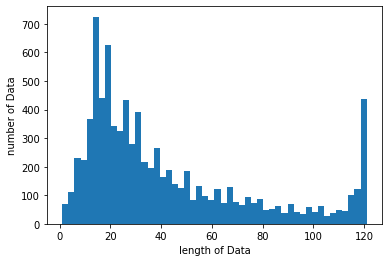

In [91]:
print('리뷰 최대 길이 : {}'.format(max(len(l) for l in x_data))) 
print('리뷰 평균 길이 : {}'.format(sum(map(len, x_data)) / len(x_data)))
plt.hist([len(s) for s in x_data], bins=50) 
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [92]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import utils
from keras.utils import np_utils

In [93]:
max_len = TextMAX
x_data = sequence.pad_sequences(sequences, maxlen = max_len)
y_data = np_utils.to_categorical(y_data)

In [94]:
textlen = len(x_data[0])

In [95]:
print(x_data.shape)
print(y_data.shape)

(8497, 120)
(8497, 11)


In [96]:
y_data = np.delete(y_data,0,axis =1)

In [97]:
print(x_data.shape)
print(y_data.shape)

(8497, 120)
(8497, 10)


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5947, 120) (2550, 120) (5947, 10) (2550, 10)


In [100]:
train_x = np.asarray(X_train)
train_y = np.asarray(y_train)
validation_x = np.asarray(X_test)
validation_y = np.asarray(y_test)

# 모델

In [ ]:
# GRU 모델
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding


hidden_units = 512


model = Sequential()
model.add(Embedding(vocab_size +1, textlen))
model.add(GRU(hidden_units))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(train_x, train_y, epochs=15,
                   validation_data=(validation_x,validation_y))

In [101]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import reuters 
from keras.models import Sequential 
from keras.layers import Dense, GRU, Embedding 
from keras.preprocessing import sequence 
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils

In [102]:
model = Sequential()
model.add(Embedding(vocab_size +1, textlen))
model.add(GRU(textlen))
model.add(Dense(10,activation = 'softmax'))

In [103]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [115]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
history = model.fit(train_x, train_y, epochs=2, batch_size = 50,
                    validation_data=(validation_x, validation_y), 
                    callbacks=[early_stop])

Epoch 1/2
119/119 [==============================] - 54s 450ms/step - loss: 0.0080 - accuracy: 0.9961 - val_loss: 8.8022 - val_accuracy: 0.2631
Epoch 2/2
119/119 [==============================] - 51s 427ms/step - loss: 0.0056 - accuracy: 0.9971 - val_loss: 8.9346 - val_accuracy: 0.2682


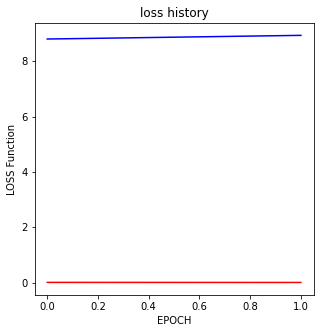

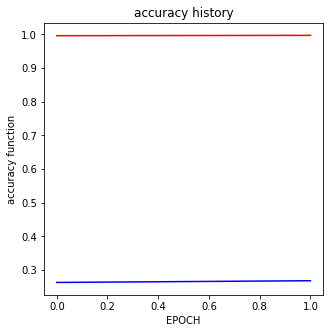

In [116]:
import matplotlib.pyplot as plt
train_history = history.history["loss"]
validate_history = history.history["val_loss"]
fig = plt.figure(figsize = (5,5))
plt.title("loss history")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validate_history,"blue")
plt.show()

train_history = history.history["accuracy"]
validate_history = history.history["val_accuracy"]
fig = plt.figure(figsize = (5,5))
plt.title("accuracy history")
plt.xlabel("EPOCH")
plt.ylabel("accuracy function")
plt.plot(train_history, "red")
plt.plot(validate_history,"blue")
plt.show()